# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Loading Data

In [2]:
df = pd.read_excel("ALL COMBINED.xlsx", engine='openpyxl').iloc[:-243, :]
df

,Name,Study Hours,SGPA_SEMESTER1,SGPA_SEMESTER2,SGPA_SEMESTER3,SGPA_SEMESTER4,STREAM,10 (%),BOARD,12 (%),BOARD.1,FIELD_OF_INTEREST
0,AADRITA ADHIKARY,22,9.36,8.94,8.84,9.28,CSB,92.33,WBBSE,81.16,CISCE,ENGINEERING
1,ABHIRUP BERA,20,7.72,7.78,8.84,8.85,CSE,83.85,WBBSE,75.80,CBSE,RESEARCH
2,ABHISHEK BISWAS,20,7.49,8.20,8.84,9.38,CSF,84.85,WBBSE,66.83,CBSE,MUSIC
3,ABHISHEK KUMAR YADAV,21,9.06,9.20,9.33,9.82,CSI,91.28,WBBSE,74.00,WBCHSE,ENGINEERING
4,ABHISHEK SHARMA,20,9.74,9.55,9.85,10.00,CSJ,81.00,ICSE,63.66,ISC,DANCE
...,...,...,...,...,...,...,...,...,...,...,...,...
509,RAJEEV RANJAN SINGH,22,9.32,8.71,8.31,9.20,CSD,81.16,CBSE,63.33,ISC,PAINTING
510,RAJU KUMAR SAH,20,9.34,8.55,8.71,8.88,CSH,87.30,CBSE,84.30,ISC,RESEARCH
511,RAKSHIT SAHOO,20,8.28,8.27,8.49,7.77,CSI,88.16,CISCE,73.67,ISC,PHYSCIOLOGY
512,RAKTIM DAS,20,8.81,8.73,8.93,8.77,CSJ,85.66,CBSE,85.67,ISC,RESEARCH


# Data Exploration

In [3]:
# Function to perform all EDA
def perform_eda(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"EDA of {str(name)} Data....")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*50)
    
    # Printing top 5 records of data
    print("First Look of Data....")
    display(df.head())
    print("="*50)
    
    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(np.object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")

    # Printing the Categorical columns
    print("\n\nDataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
    
    # Printing info of data like data type, non null values
    print("="*50)
    print("Information of Data....")
    print(df.info())
    print("="*50)
    
    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [4]:
perform_eda(df, "CGPA")

EDA of CGPA Data....
Size 6168
Columns 12
Records 514
First Look of Data....


,Name,Study Hours,SGPA_SEMESTER1,SGPA_SEMESTER2,SGPA_SEMESTER3,SGPA_SEMESTER4,STREAM,10 (%),BOARD,12 (%),BOARD.1,FIELD_OF_INTEREST
0,AADRITA ADHIKARY,22,9.36,8.94,8.84,9.28,CSB,92.33,WBBSE,81.16,CISCE,ENGINEERING
1,ABHIRUP BERA,20,7.72,7.78,8.84,8.85,CSE,83.85,WBBSE,75.80,CBSE,RESEARCH
2,ABHISHEK BISWAS,20,7.49,8.20,8.84,9.38,CSF,84.85,WBBSE,66.83,CBSE,MUSIC
3,ABHISHEK KUMAR YADAV,21,9.06,9.20,9.33,9.82,CSI,91.28,WBBSE,74.00,WBCHSE,ENGINEERING
4,ABHISHEK SHARMA,20,9.74,9.55,9.85,10.00,CSJ,81.00,ICSE,63.66,ISC,DANCE


Dataset has following Numerical columns...
 1) Study Hours
 2) SGPA_SEMESTER1
 3) SGPA_SEMESTER2
 4) SGPA_SEMESTER3
 5) SGPA_SEMESTER4
 6) 10 (%)
 7) 12 (%)


Dataset has following Categorical columns...
 1) Name
 2) STREAM
 3) BOARD
 4) BOARD.1
 5) FIELD_OF_INTEREST
Information of Data....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               514 non-null    object 
 1   Study Hours        514 non-null    int64  
 2   SGPA_SEMESTER1     514 non-null    float64
 3   SGPA_SEMESTER2     514 non-null    float64
 4   SGPA_SEMESTER3     511 non-null    float64
 5   SGPA_SEMESTER4     510 non-null    float64
 6   STREAM             514 non-null    object 
 7   10 (%)             514 non-null    float64
 8   BOARD              514 non-null    object 
 9   12 (%)             514 non-null    float64
 10  BOARD.1            514

,Name,Study Hours,SGPA_SEMESTER1,SGPA_SEMESTER2,SGPA_SEMESTER3,SGPA_SEMESTER4,STREAM,10 (%),BOARD,12 (%),BOARD.1,FIELD_OF_INTEREST
count,514,514.000000,514.000000,514.000000,511.000000,510.000000,514,514.000000,514,514.000000,514,514
unique,509,NaN,NaN,NaN,NaN,NaN,10,NaN,42,NaN,49,15
top,ANKUR KUMAR SINGH,NaN,NaN,NaN,NaN,NaN,CSD,NaN,WBBSE,NaN,CBSE,TESTING
freq,2,NaN,NaN,NaN,NaN,NaN,56,NaN,219,NaN,167,45
mean,NaN,21.445525,8.771265,8.733268,8.989785,9.297686,NaN,83.350564,NaN,71.896206,NaN,NaN
std,NaN,1.136815,0.710536,0.494023,0.594183,0.485958,NaN,10.381082,NaN,10.333693,NaN,NaN
min,NaN,20.000000,5.530000,6.860000,4.700000,5.170000,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,20.000000,8.360000,8.470000,8.800000,9.100000,NaN,79.710000,NaN,65.500000,NaN,NaN
50%,NaN,21.000000,8.810000,8.810000,9.130000,9.375000,NaN,84.465000,NaN,71.915000,NaN,NaN
75%,NaN,22.000000,9.340000,9.080000,9.330000,9.600000,NaN,89.300000,NaN,78.160000,NaN,NaN


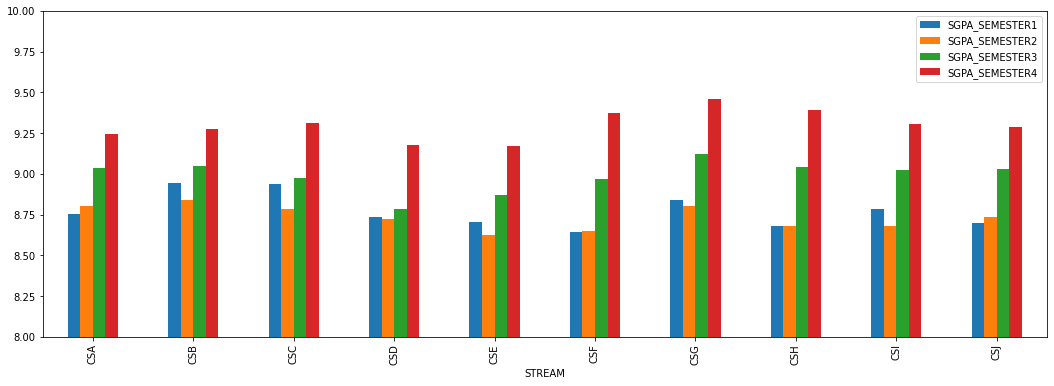

In [5]:
df.groupby("STREAM").mean()[["SGPA_SEMESTER1", "SGPA_SEMESTER2", "SGPA_SEMESTER3", "SGPA_SEMESTER4"]].plot(kind="bar", figsize=(18, 6))
plt.ylim(8, 10)
plt.show()

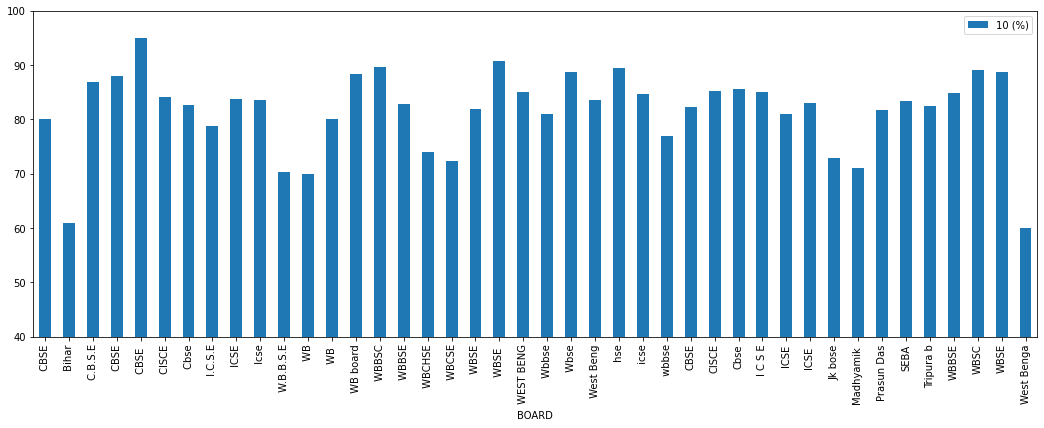

In [6]:
df.groupby("BOARD").mean()[["10 (%)"]].plot(kind="bar", figsize=(18, 6))
plt.ylim(40, 100)
plt.show()

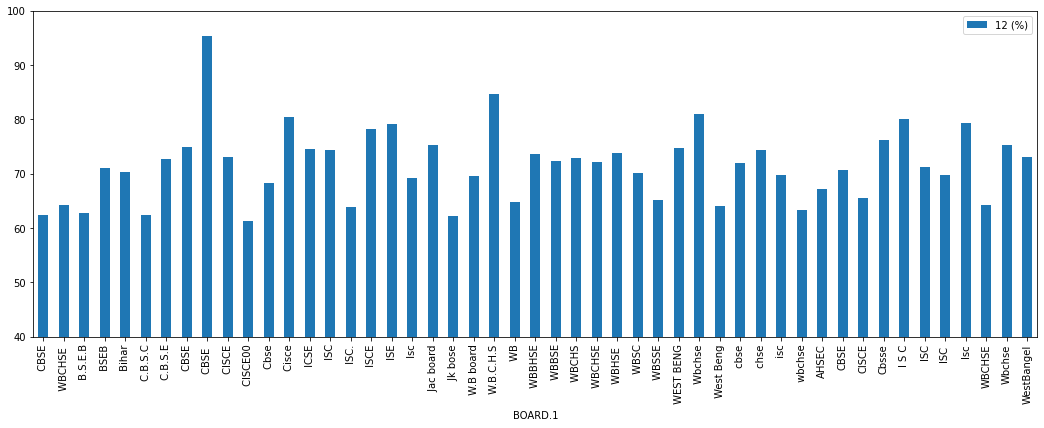

In [7]:
df.groupby("BOARD.1").mean()[["12 (%)"]].plot(kind="bar", figsize=(18, 6))
plt.ylim(40, 100)
plt.show()

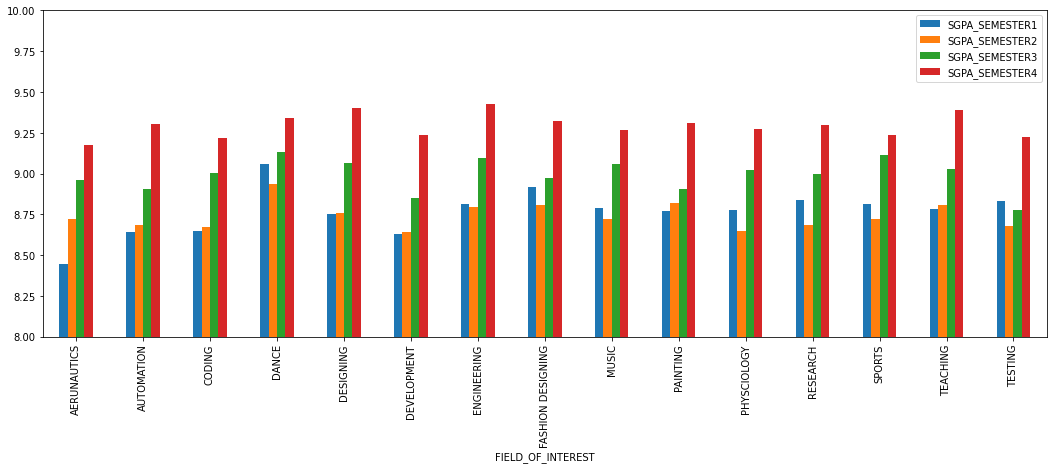

In [32]:
f=df.groupby("FIELD_OF_INTEREST").mean()[["SGPA_SEMESTER1", "SGPA_SEMESTER2", "SGPA_SEMESTER3", "SGPA_SEMESTER4"]].plot(kind="bar", figsize=(18, 6))
plt.ylim(8, 10)
plt.show()

In [39]:
df = df.groupby('FIELD_OF_INTEREST').mean()

df = df.reset_index()
df

,FIELD_OF_INTEREST,Study Hours,SGPA_SEMESTER1,SGPA_SEMESTER2,SGPA_SEMESTER3,SGPA_SEMESTER4,10 (%),12 (%)
0,AERUNAUTICS,21.826087,8.446522,8.718696,8.962609,9.177727,82.155652,70.440435
1,AUTOMATION,21.194444,8.641389,8.683889,8.904722,9.302500,81.379722,68.396944
2,CODING,21.485714,8.648571,8.674000,9.001143,9.217714,82.519429,72.978286
3,DANCE,21.666667,9.060833,8.938750,9.135000,9.338333,85.756667,72.030833
4,DESIGNING,21.333333,8.750513,8.758974,9.065128,9.404615,83.725897,70.939487
5,DEVELOPMENT,21.379310,8.626552,8.640000,8.847241,9.234828,83.417931,73.616207
6,ENGINEERING,21.447368,8.812632,8.792105,9.095946,9.429189,81.181842,67.605263
7,FASHION DESIGNING,21.647059,8.916471,8.806765,8.972059,9.322353,83.415588,72.666471
8,MUSIC,21.307692,8.786923,8.723846,9.058205,9.268718,82.982564,71.233590
9,PAINTING,21.814815,8.767407,8.818889,8.903333,9.310000,83.020741,74.591481


In [40]:
df[["FIELD_OF_INTEREST","SGPA_SEMESTER1", "SGPA_SEMESTER2", "SGPA_SEMESTER3", "SGPA_SEMESTER4"]]

,FIELD_OF_INTEREST,SGPA_SEMESTER1,SGPA_SEMESTER2,SGPA_SEMESTER3,SGPA_SEMESTER4
0,AERUNAUTICS,8.446522,8.718696,8.962609,9.177727
1,AUTOMATION,8.641389,8.683889,8.904722,9.302500
2,CODING,8.648571,8.674000,9.001143,9.217714
3,DANCE,9.060833,8.938750,9.135000,9.338333
4,DESIGNING,8.750513,8.758974,9.065128,9.404615
5,DEVELOPMENT,8.626552,8.640000,8.847241,9.234828
6,ENGINEERING,8.812632,8.792105,9.095946,9.429189
7,FASHION DESIGNING,8.916471,8.806765,8.972059,9.322353
8,MUSIC,8.786923,8.723846,9.058205,9.268718
9,PAINTING,8.767407,8.818889,8.903333,9.310000


In [44]:
sns.barplot(x=["SGPA_SEMESTER1","SGPA_SEMESTER1"],

y="FIELD_OF_INTEREST",

data=df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
f = f.reset_index()

In [31]:
sns.barplot(x="FIELD_OF_INTEREST",

y=["SGPA_SEMESTER1","SGPA_SEMESTER2","SGPA_SEMESTER3","SGPA_SEMESTER4"],
data=f)
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [14]:
f.value_counts()

SGPA_SEMESTER1  SGPA_SEMESTER2  SGPA_SEMESTER3  SGPA_SEMESTER4
8.446522        8.718696        8.962609        9.177727          1
8.626552        8.640000        8.847241        9.234828          1
8.641389        8.683889        8.904722        9.302500          1
8.648571        8.674000        9.001143        9.217714          1
8.750513        8.758974        9.065128        9.404615          1
8.767407        8.818889        8.903333        9.310000          1
8.778158        8.650263        9.022632        9.270263          1
8.782424        8.805152        9.030303        9.390303          1
8.786923        8.723846        9.058205        9.268718          1
8.812414        8.721724        9.116552        9.237931          1
8.812632        8.792105        9.095946        9.429189          1
8.832444        8.679333        8.778864        9.222500          1
8.835778        8.684889        8.997955        9.299091          1
8.916471        8.806765        8.972059        9.322

In [13]:
sns.countplot(f)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Data Cleaning

In [69]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    # Iterating all columns
    for col in df.columns:
        # Calculating different details and storing it into list
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    # Converting list into table
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    # Setting column name as index
    stats_df.set_index('Feature', drop=True, inplace=True)
    # Droping features in which no NAN  is present
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    # Sorting table according to number of NAN
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

In [70]:
statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
SGPA_SEMESTER4,138,6,0.793651,float64
SGPA_SEMESTER3,156,4,0.529101,float64


In [71]:
df.dropna(inplace=True)

In [72]:
df.drop_duplicates(inplace=True)

In [74]:
cols = ["Name", "STREAM", "10 (%)", "BOARD", "12 (%)", "BOARD.1"]
df.drop(cols, axis=1, inplace=True)

In [77]:
df = df[["Age", "SGPA_SEMESTER1", "SGPA_SEMESTER2", "SGPA_SEMESTER3", "SGPA_SEMESTER4"]]

In [78]:
X = df.drop("SGPA_SEMESTER4", axis=1)
y = df.SGPA_SEMESTER4

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building Models

In [80]:
# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []

In [81]:
import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Training Score  : ', train)   
    print("-"*50)
    print('Testing Score   : ', test)   
    print("-"*50)
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Training Score  :  0.4980382172612906
--------------------------------------------------
Testing Score   :  0.3984264690318954
--------------------------------------------------
Root mean squared error (RMSE) :  0.4409263723658951
--------------------------------------------------
Mean absolute error (MAE) :  0.267274771606089
--------------------------------------------------
R2 score :  0.3984264690318954
--------------------------------------------------
							-----------------------------------------------------------
							 Time for detection (Ridge) : 0.086 seconds...
							-----------------------------------------------------------

+ ==============================================================================================

In [59]:
comp = pd.DataFrame({"Models": dict(models).keys(), "Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l, "R2 Score": r2_l})
comp

,Models,Training Score,Testing Score,MAE,RMSE,R2 Score
0,Ridge,0.422631,0.586081,0.265167,0.490929,0.586081
1,LinearRegression,0.422636,0.587557,0.265160,0.490052,0.587557
2,KNeighborsRegressor,0.314923,0.151051,0.395933,0.703075,0.151051
3,Random Forest,0.923936,0.407942,0.291739,0.587142,0.407942
4,Decision Tree,1.000000,0.090783,0.423667,0.727603,0.090783


# Final Model

In [82]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [83]:
# save the model to disk
import pickle as pkl

filename = 'finalized_model.sav'
pkl.dump(model, open(filename, 'wb'))